Using groq for open source LLM

In [1]:
!pip install --upgrade --quiet langchain langchain-community langchain-groq neo4j

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.3 MB/s eta 0:00:00


In [2]:
# Graph DB Configurations
NEO4J_URI="neo4j+s://b5307f03.databases.neo4j.io"
NEO4J_USERNAME="neo4j"
NEO4J_PASSWORD="lslJI8GbXx-Dugy6owj1q5Lu_a8sUpMHx47BhVXMOJ4"

NOTE: Store the above information in the secrets in the sidebar of the google colab

In [3]:
import os
os.environ["NEO4J_URI"]=NEO4J_URI
os.environ["NEO4J_USERNAME"]=NEO4J_USERNAME
os.environ["NEO4J_PASSWORD"]=NEO4J_PASSWORD

# now connect the neo4j to the langchain

In [5]:
from langchain_community.graphs import Neo4jGraph
graph = Neo4jGraph(
    url=NEO4J_URI,
    username=NEO4J_USERNAME,
    password=NEO4J_PASSWORD,
)

<ipython-input-5-eeca49623a4e>:2: LangChainDeprecationWarning: The class `Neo4jGraph` was deprecated in LangChain 0.3.8 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-neo4j package and should be used instead. To use it run `pip install -U :class:`~langchain-neo4j` and import as `from :class:`~langchain_neo4j import Neo4jGraph``.
  graph = Neo4jGraph(


In [6]:
graph

Now, go on groq.com website to access the free LLMs, go on groq cloud and select API keys from sidebar and then create the API key for yourself


In [7]:
groq_api_key ="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"

In [8]:
from langchain_groq import ChatGroq   # ChatGroq is used to interact with your Groq model

llm = ChatGroq(groq_api_key=groq_api_key, model_name="gemma2-9b-it")

In [9]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ad38e821f30>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ad38e820490>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

Now, we can be able to interact with our Groq model

In [12]:
from langchain_core.documents import Document
text = """
Cristiano Ronaldo dos Santos Aveiro GOIH ComM (Portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaldu] ⓘ; born 5 February 1985) is a Portuguese professional footballer who plays as a forward for and captains
both the Saudi Pro League club Al Nassr and the Portugal national team. Widely regarded as one of the greatest players of all time, Ronaldo has won numerous individual accolades throughout his career,
such as five Ballon d'Or awards, a record three UEFA Men's Player of the Year Awards, four European Golden Shoes, and was named five times the world's best player by FIFA,[note 3] the most by a
European player. He has won 33 trophies in his career, including seven league titles, five UEFA Champions Leagues, the UEFA European Championship and the UEFA Nations League.
Ronaldo holds the records for most appearances (183), goals (140) and assists (42) in the Champions League, most appearances (30), assists (8), goals in the European Championship (14),
international appearances (217) and international goals (135). He is one of the few players to have made over 1,200 professional career appearances, the most by an outfield player, and
has scored over 900 official senior career goals for club and country, making him the top goalscorer of all time.[note 4]
"""

In [14]:
documents = [Document(page_content=text)]

In [15]:
documents

[Document(metadata={}, page_content="\nCristiano Ronaldo dos Santos Aveiro GOIH ComM (Portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaldu] ⓘ; born 5 February 1985) is a Portuguese professional footballer who plays as a forward for and captains \nboth the Saudi Pro League club Al Nassr and the Portugal national team. Widely regarded as one of the greatest players of all time, Ronaldo has won numerous individual accolades throughout his career, \nsuch as five Ballon d'Or awards, a record three UEFA Men's Player of the Year Awards, four European Golden Shoes, and was named five times the world's best player by FIFA,[note 3] the most by a \nEuropean player. He has won 33 trophies in his career, including seven league titles, five UEFA Champions Leagues, the UEFA European Championship and the UEFA Nations League. \nRonaldo holds the records for most appearances (183), goals (140) and assists (42) in the Champions League, most appearances (30), assists (8), goals in the European Championship (14)

In [16]:
!pip install --upgrade --quiet langchain_experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 16.1 MB/s eta 0:00:00


In [17]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
llm_transformer = LLMGraphTransformer(llm = llm)

In [18]:
llm_transformer.convert_to_graph_documents(documents) #converting the documents to graph

[GraphDocument(nodes=[Node(id='Cristiano Ronaldo Dos Santos Aveiro Goih Comm', type='Person', properties={})], relationships=[Relationship(source=Node(id='Cristiano Ronaldo Dos Santos Aveiro Goih Comm', type='Person', properties={}), target=Node(id='Al Nassr', type='Organization', properties={}), type='PLAYS_FOR', properties={}), Relationship(source=Node(id='Cristiano Ronaldo Dos Santos Aveiro Goih Comm', type='Person', properties={}), target=Node(id='Portugal National Team', type='Team', properties={}), type='CAPTAINS', properties={})], source=Document(metadata={}, page_content="\nCristiano Ronaldo dos Santos Aveiro GOIH ComM (Portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaldu] ⓘ; born 5 February 1985) is a Portuguese professional footballer who plays as a forward for and captains \nboth the Saudi Pro League club Al Nassr and the Portugal national team. Widely regarded as one of the greatest players of all time, Ronaldo has won numerous individual accolades throughout his career, \nsuch a

In [19]:
graph_documents = llm_transformer.convert_to_graph_documents(documents) #converting the documents to graph

In [20]:
graph_documents

[GraphDocument(nodes=[Node(id='Cristiano Ronaldo Dos Santos Aveiro Goih Comm', type='Person', properties={})], relationships=[Relationship(source=Node(id='Cristiano Ronaldo Dos Santos Aveiro Goih Comm', type='Person', properties={}), target=Node(id='Al Nassr', type='Sports team', properties={}), type='PLAYS_FOR', properties={}), Relationship(source=Node(id='Cristiano Ronaldo Dos Santos Aveiro Goih Comm', type='Person', properties={}), target=Node(id='Portugal National Team', type='Sports team', properties={}), type='CAPTAINS', properties={})], source=Document(metadata={}, page_content="\nCristiano Ronaldo dos Santos Aveiro GOIH ComM (Portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaldu] ⓘ; born 5 February 1985) is a Portuguese professional footballer who plays as a forward for and captains \nboth the Saudi Pro League club Al Nassr and the Portugal national team. Widely regarded as one of the greatest players of all time, Ronaldo has won numerous individual accolades throughout his career, \n

In [21]:
graph_documents[0].nodes

[Node(id='Cristiano Ronaldo Dos Santos Aveiro Goih Comm', type='Person', properties={})]

Will create a RAG Pipeline

DAtaset: https://github.com/tomasonjo/blog-datasets/blob/main/movies/movies.csv

In [23]:
### Load the dataset of movie

# Cypher Query
movie_query="""
LOAD CSV WITH HEADERS FROM
'https://raw.githubusercontent.com/tomasonjo/blog-datasets/main/movies/movies_small.csv' as row

MERGE(m:Movie{id:row.movieId})
SET m.released = date(row.released),
    m.title = row.title,
    m.imdbRating = toFloat(row.imdbRating)
FOREACH (director in split(row.director, '|') |
    MERGE (p:Person {name:trim(director)})
    MERGE (p)-[:DIRECTED]->(m))
FOREACH (actor in split(row.actors, '|') |
    MERGE (p:Person {name:trim(actor)})
    MERGE (p)-[:ACTED_IN]->(m))
FOREACH (genre in split(row.genres, '|') |
    MERGE (g:Genre {name:trim(genre)})
    MERGE (m)-[:IN_GENRE]->(g))
"""

### Explanation

# Cypher Query

movie_query="""

LOAD CSV WITH HEADERS FROM
'https://raw.githubusercontent.com/tomasonjo/blog-datasets/main/movies/movies_small.csv' as row

# m is node, Movie is label name, id is the primary key or property
MERGE(m:Movie{id:row.movieId})


In [24]:
graph

In [25]:
graph.query(movie_query)

[]

[] this means the query executed and now go and see the neo4j, you can see several nodes and relationships have been created

Nodes- 1564

Relationships- 2137

https://console-preview.neo4j.io/tools/query

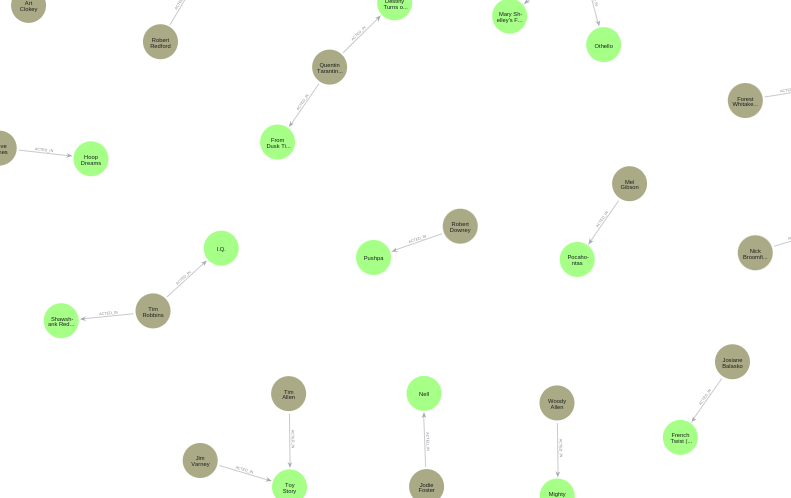

In [26]:
# prompt: visualise the .png image stored at location: /content/visualisation (1).png

from IPython.display import Image
Image('/content/visualisation (1).png')

This is the graph being created in the Neo4j when the above cypher query is being executed

In [27]:
graph.refresh_schema()
print(graph.schema)

Node properties:
Person {name: STRING, born: INTEGER}
Movie {title: STRING, released: INTEGER, name: STRING, id: STRING, imdbRating: FLOAT}
Genre {name: STRING}
Relationship properties:

The relationships:
(:Person)-[:ACTED_IN]->(:Movie)
(:Person)-[:DIRECTED]->(:Movie)
(:Movie)-[:IN_GENRE]->(:Genre)


Now, creating the cypher query with LLM Model

In [31]:
from langchain.chains import GraphCypherQAChain
chain = GraphCypherQAChain.from_llm(
    llm=llm,
    graph=graph,
    verbose=True,
    allow_dangerous_requests=True  # Acknowledge the risks
)

In [32]:
chain

GraphCypherQAChain(verbose=True, graph=<langchain_community.graphs.neo4j_graph.Neo4jGraph object at 0x7ad3c20c2f20>, cypher_generation_chain=LLMChain(verbose=False, prompt=PromptTemplate(input_variables=['question', 'schema'], input_types={}, partial_variables={}, template='Task:Generate Cypher statement to query a graph database.\nInstructions:\nUse only the provided relationship types and properties in the schema.\nDo not use any other relationship types or properties that are not provided.\nSchema:\n{schema}\nNote: Do not include any explanations or apologies in your responses.\nDo not respond to any questions that might ask anything else than for you to construct a Cypher statement.\nDo not include any text except the generated Cypher statement.\n\nThe question is:\n{question}'), llm=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ad38e821f30>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ad38e820490>, model_name='gemma2-9b-i

Now, chain is being created, now you can ask any query

In [34]:
response = chain.invoke({"query": "Who was the director of the movie GoldenEye"})



> Entering new GraphCypherQAChain chain...
Generated Cypher:
cypher
MATCH (m:Movie {title: "GoldenEye"})-[:DIRECTED]->(p:Person)
RETURN p.name

Full Context:
[]

> Finished chain.


In [35]:
response

{'query': 'Who was the director of the movie GoldenEye',
 'result': "I don't know the answer. \n"}

In [36]:
response = chain.invoke({"query": "Who was the actor in the movie Pushpa"})



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (m:Movie {title: "Pushpa"})-[r:ACTED_IN]->(p:Person) RETURN p.name 

Full Context:
[]

> Finished chain.


In [37]:
response

{'query': 'Who was the actor in the movie Pushpa',
 'result': "I don't know the answer. \n"}

In [38]:
response = chain.invoke({"query": "Who was the actor in the movie Quentin Tarantino"})



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (movie:Movie {title: 'Quentin Tarantino'})<-[:ACTED_IN]-(person:Person) RETURN person.name 

Full Context:
[]

> Finished chain.
